Task 1: Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers

Task 2: Load the Data

In [2]:
df= pd.read_csv('btc.csv', index_col='Date',
parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
2022-10-08,19546.328125,19601.695313,19299.414063,19416.568359,19416.568359,16437423167
2022-10-09,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532
2022-10-10,19446.416016,19515.466797,19102.978516,19141.484375,19141.484375,27425022774
2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910


Task 3: Explore the Data


In [3]:
# Display the summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,24383.784543,24753.218633,24042.282136,24406.143197,24406.143197,2.058259e+10
std,4645.865468,4715.973169,4588.591804,4645.356404,4645.356404,1.276868e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.331173e+09
25%,20395.991211,20793.224121,20086.463867,20487.898438,20487.898438,1.271677e+10
50%,26043.854492,26383.118164,25740.647461,26048.612305,26048.612305,1.702901e+10
75%,28067.094239,28512.833984,27534.169433,28075.270019,28075.270019,2.554995e+10
max,31474.720703,31814.515625,30659.355469,31476.048828,31476.048828,1.189925e+11


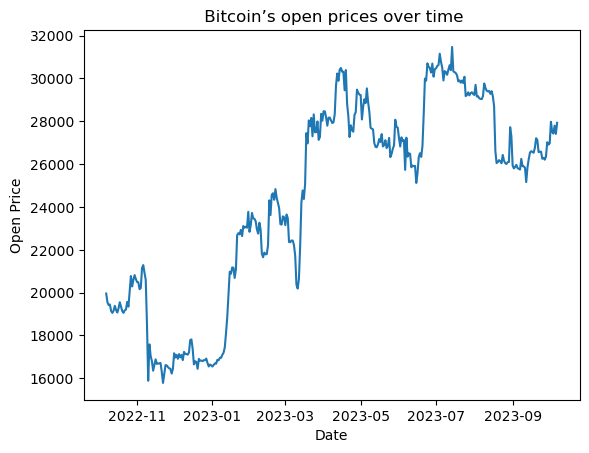

In [4]:
# Display the line plot
plt.plot(df.index,  df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title(' Bitcoin’s open prices over time')
plt.show()

Task 4: Manipulate the Data


In [5]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame from the scaled data
df2 = pd.DataFrame(scaled_data, columns=df.columns, index=df.index) 

In [6]:
print(df2)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-10-07  0.266068  0.243424  0.252103  0.239634   0.239634  0.210240
2022-10-08  0.239863  0.215188  0.245703  0.231330   0.231330  0.097714
2022-10-09  0.231652  0.211387  0.249013  0.233233   0.233233  0.101231
2022-10-10  0.233496  0.209647  0.232660  0.213796   0.213796  0.194383
2022-10-11  0.213906  0.192071  0.220882  0.208056   0.208056  0.205702
...              ...       ...       ...       ...        ...       ...
2023-10-03  0.747237  0.733488  0.771362  0.742104   0.742104  0.053463
2023-10-04  0.742191  0.743735  0.773494  0.765650   0.765650  0.051136
2023-10-05  0.765742  0.760777  0.781960  0.741207   0.741207  0.057593
2023-10-06  0.741111  0.771103  0.771333  0.775033   0.775033  0.071803
2023-10-07  0.774166  0.752820  0.816085  0.773272   0.773272  0.071131

[366 rows x 6 columns]


Task 5: Generate the Input-Output Pairs


- In this task, you'll strategically shape the data for effective LSTM model training by defining the WINDOW_SIZE and creating input-output pairs. The WINDOW_SIZE is crucial, influencing how many past time steps the model considers, vital for capturing temporal patterns.

- To create input-output pairs, you will use a sliding window approach. This means that for each position in the data, you will take a sequence of WINDOW_SIZE previous values as the input (X1), and the next value right after this sequence as the output (y1). For example, if your WINDOW_SIZE is 3 and your data is [1, 2, 3, 4, 5], the first input-output pair would be ([1, 2, 3], 4), the second pair would be ([2, 3, 4], 5), and so on. These pairs are fundamental, providing the LSTM model with historical context for predictions. You'll create two variables, X1 and y1. X1 represents input data, capturing the temporal sequence while y1 is the target output, essential for training the model to forecast future values accurately.

In [7]:
def df_to_X_y(df, window_size=15):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i+window_size, 1:]  # Use columns from index 1 to the end (High to Volume)
        X.append(row)
        label = df_as_np[i+window_size, 0]  # Target 'Open' (index 0)
        y.append(label)
    return np.array(X), np.array(y)
# Define window size
WINDOW_SIZE = 15

# Generate X and y pairs from df_scaled
X1, y1 = df_to_X_y(df2, WINDOW_SIZE) 

Task 6: Create and Compile the LSTM Model


In [8]:
#define the number of features
num_features = df2.shape[1] - 1

# Create a sequential model for the univariate LSTM.
model1 = models.Sequential() 

# Add an input layer with the specified shape (WINDOW_SIZE, 1).
model1.add(layers.InputLayer((WINDOW_SIZE, num_features)))

# Add an LSTM layer with 64 units.
model1.add(layers.LSTM(64))

# Add a dense layer with 8 units and ReLU activation function.
model1.add(layers.Dense(8, activation='relu'))

# Add a dense layer with 1 unit and linear activation function (for regression).
model1.add(layers.Dense(1, activation='linear'))

# Compile the model using the mean squared error loss and the Adam optimizer with a learning rate of 0.0001.
model1.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))

Task 7: Train the LSTM Model


In [9]:
split_index = int(len(df2) * 0.8)
X_train, y_train = X1[:split_index], y1[:split_index]
X_val, y_val = X1[split_index:], y1[split_index:]


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(292, 15, 5)
(292,)
(59, 15, 5)
(59,)


In [11]:
model1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.6527 - val_loss: 0.6913
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4528 - val_loss: 0.4733
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3152 - val_loss: 0.3272
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2546 - val_loss: 0.2688
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2069 - val_loss: 0.2216
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1707 - val_loss: 0.1769
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1359 - val_loss: 0.1375
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1079 - val_loss: 0.1019
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0773 - val_loss: 0.0707
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0513 - val_loss: 0.0454
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0381 - val_loss: 0.0257
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste

Task 8: Predict the Training Data


In [12]:
train_predictions = model1.predict(X1).flatten()
train_dates = df.index[WINDOW_SIZE:len(df2)]
train_results = pd.DataFrame(data={'Date': train_dates, 'Train Predictions': train_predictions, 'Actuals': y1.flatten()})
train_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


,Date,Train Predictions,Actuals
0,2022-10-22,0.228645,0.216033
1,2022-10-23,0.228315,0.218286
2,2022-10-24,0.231185,0.241229
3,2022-10-25,0.232710,0.227031
4,2022-10-26,0.238770,0.274651
...,...,...,...
346,2023-10-03,0.726377,0.747237
347,2023-10-04,0.730004,0.742191
348,2023-10-05,0.736264,0.765742
349,2023-10-06,0.741562,0.741111


Task 9: Generate Future Dates for Predictions


In this task, you’ll set the number of future prediction steps and generate future dates for predictions. This is essential for forecasting and extending the analysis beyond the existing dataset. Set the number of future predictions num_future_steps to 30, representing the number of steps into the future you want to predict.

Generate future dates for predictions using the last date from the existing dataset.

Print the future_dates.

In [13]:
num_future_steps = 30
last_date = pd.to_datetime(df.index[-1])
print("last date")
print(last_date)
future_dates = pd.date_range(last_date + pd.DateOffset(days=1), periods=num_future_steps)
print("future dates")
future_dates

last date
2023-10-07 00:00:00
future dates


DatetimeIndex(['2023-10-08', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31',
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06'],
              dtype='datetime64[ns]', freq='D')

Task 10: Make Predictions for Future Dates


In this task, you’ll use the trained LSTM model to predict future time steps. This involves looping through the number of future steps you want to predict, using the model to predict the next time step based on the recent data, and updating the recent data for the next prediction.

Perform the following operations in this task:

Create an empty list, future_predictions, to store the predicted values for future time steps.

Initialize recent_data using the last window from the training set. This involves taking the last sequence from your input data X1 and reshaping it to fit the model’s expected input shape (1, WINDOW_SIZE, 1).

Use a loop to iterate through the number of future steps:

Predict the next time step using the trained LSTM model (model1).

Append the predicted value to the future_predictions list.

Prepare the predicted value for the next iteration by converting it to an array and updating the recent data.

Create a DataFrame, future_results, to store the results, including the future dates and corresponding predictions. Print the future_results at the end.

In [14]:
# Make sure to use the correct number of features.
num_features = X1.shape[-1]
future_predictions = [] 
recent_data = X1[-1].reshape(1, WINDOW_SIZE, num_features) 
for _ in range(num_future_steps):
    prediction = model1.predict(recent_data)[0][0]
    future_predictions.append(prediction)
    # Prepare the prediction to append to recent_data
    # Assuming the model outputs a scalar, we need to create a dummy feature array for it
    dummy_feature = np.zeros((1, num_features))
    dummy_feature[0, 0] = prediction  # Use the prediction for the 'Open' feature
    prediction = np.array([prediction])
    # Update the recent data by appending the new prediction and removing the oldest value
    recent_data = np.append(recent_data[:, 1:, :], dummy_feature.reshape(1, 1, num_features), axis=1)
future_results = pd.DataFrame(data={'Date': future_dates, 'Predictions': future_predictions})
future_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

,Date,Predictions
0,2023-10-08,0.748587
1,2023-10-09,0.660055
2,2023-10-10,0.574690
3,2023-10-11,0.498357
4,2023-10-12,0.431289
5,2023-10-13,0.372067
6,2023-10-14,0.319315
7,2023-10-15,0.274357
8,2023-10-16,0.236418
9,2023-10-17,0.204542


Task 11: Inverse Transform Predictions


In this task, you’ll create a crucial function that transforms the scaled predictions back to their original scale. This step is essential for interpreting and analyzing the predictions meaningfully and aligning them with the original data distribution.

Perform the following operations in this task:

Define a function inverse_transform_dataframe to inverse transform a DataFrame using a scaler.

Create a copy of the original DataFrame.

Iterate through each column, excluding the Date column.

Inverse transform the values in the current column using the same scaler you used in Task 4.

Update the original DataFrame with the inverse-transformed values.

Return the inverse-transformed DataFrame.

Inverse transform the predictions of the training results using the defined function and the scaler.

Inverse transform the predictions of the future results using the defined function and the scaler.

Combine the inverse-transformed training results with the inverse-transformed future results in a new DataFrame combined_results.

Export the combined_results DataFrame to a new CSV file /usercode/combined_results.csv.

Export the future_results DataFrame to a new CSV file /usercode/future_results.csv.

In [15]:
def inverse_transform_predictions(predictions, scaler, original_df):
    """
    Inverse transforms the scaled predictions using the original scaler.
    
    Args:
    predictions (np.array): Array of scaled predictions.
    scaler (MinMaxScaler): Fitted scaler used for initial scaling.
    original_df (pd.DataFrame): Original DataFrame used for scaling to provide shape information.
    
    Returns:
    np.array: Array of inverse-transformed predictions.
    """
    # Create a dummy DataFrame with the same shape as the original for inverse transform
    dummy_df = np.zeros((predictions.shape[0], original_df.shape[1]))
    dummy_df[:, 0] = predictions  # Place predictions in the first column
    
    # Inverse transform using the scaler
    df_inverse = scaler.inverse_transform(dummy_df)
    
    # Return only the first column, which corresponds to the target 'Open' predictions
    return df_inverse[:, 0]



# Combine train_results with future_results
combined_results = pd.concat([train_results, future_results], axis=0)
print("This are trained results")
print(train_results)
print("This are future results")
print(future_results)
print("This are combined results")
print(combined_results)

combined_results.to_csv("combined_results.csv")
future_results.to_csv("future_results.csv")

This are trained results
          Date  Train Predictions   Actuals
0   2022-10-22           0.228645  0.216033
1   2022-10-23           0.228315  0.218286
2   2022-10-24           0.231185  0.241229
3   2022-10-25           0.232710  0.227031
4   2022-10-26           0.238770  0.274651
..         ...                ...       ...
346 2023-10-03           0.726377  0.747237
347 2023-10-04           0.730004  0.742191
348 2023-10-05           0.736264  0.765742
349 2023-10-06           0.741562  0.741111
350 2023-10-07           0.748587  0.774166

[351 rows x 3 columns]
This are future results
         Date  Predictions
0  2023-10-08     0.748587
1  2023-10-09     0.660055
2  2023-10-10     0.574690
3  2023-10-11     0.498357
4  2023-10-12     0.431289
5  2023-10-13     0.372067
6  2023-10-14     0.319315
7  2023-10-15     0.274357
8  2023-10-16     0.236418
9  2023-10-17     0.204542
10 2023-10-18     0.177618
11 2023-10-19     0.155173
12 2023-10-20     0.136484
13 2023-10-21     0.1

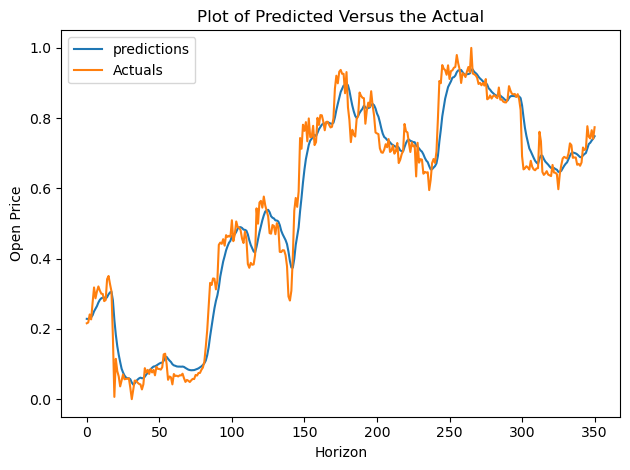

In [126]:
plt.plot(combined_results['Train Predictions'], label='predictions')
plt.plot(combined_results['Actuals'], label='Actuals')
plt.title('Plot of Predicted Versus the Actual')
plt.xlabel('Horizon')
plt.ylabel('Open Price')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
#import joblib 
#import joblib 
# Save the scaler
#joblib.dump(scaler, 'scaler.pkl')
# Save the trained model
#model1.save('lstm_model.h5')

### Using Arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA model
model = ARIMA(df2['Open'], order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=30)
print(predictions)

c:\Users\512GB\anaconda_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\512GB\anaconda_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\512GB\anaconda_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-10-08    0.774594
2023-10-09    0.774993
2023-10-10    0.776322
2023-10-11    0.776756
2023-10-12    0.776218
2023-10-13    0.776301
2023-10-14    0.776287
2023-10-15    0.776237
2023-10-16    0.776234
2023-10-17    0.776241
2023-10-18    0.776236
2023-10-19    0.776237
2023-10-20    0.776238
2023-10-21    0.776238
2023-10-22    0.776238
2023-10-23    0.776238
2023-10-24    0.776238
2023-10-25    0.776238
2023-10-26    0.776238
2023-10-27    0.776238
2023-10-28    0.776238
2023-10-29    0.776238
2023-10-30    0.776238
2023-10-31    0.776238
2023-11-01    0.776238
2023-11-02    0.776238
2023-11-03    0.776238
2023-11-04    0.776238
2023-11-05    0.776238
2023-11-06    0.776238
Freq: D, Name: predicted_mean, dtype: float64


### Using Facebook Prophet

In [79]:
from prophet import Prophet
df_fb= pd.read_csv('btc.csv')
df_fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
1,2022-10-08,19546.328125,19601.695313,19299.414063,19416.568359,19416.568359,16437423167
2,2022-10-09,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532
3,2022-10-10,19446.416016,19515.466797,19102.978516,19141.484375,19141.484375,27425022774
4,2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910


In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [81]:
# checking for Missing Values
(df_fb.isnull().sum()/len(df_fb))*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [82]:
# Making the time colume to datetime and setting it to index
df_fb['Date'] = pd.to_datetime(df_fb['Date'])
df_fb.set_index('Date', inplace=True)

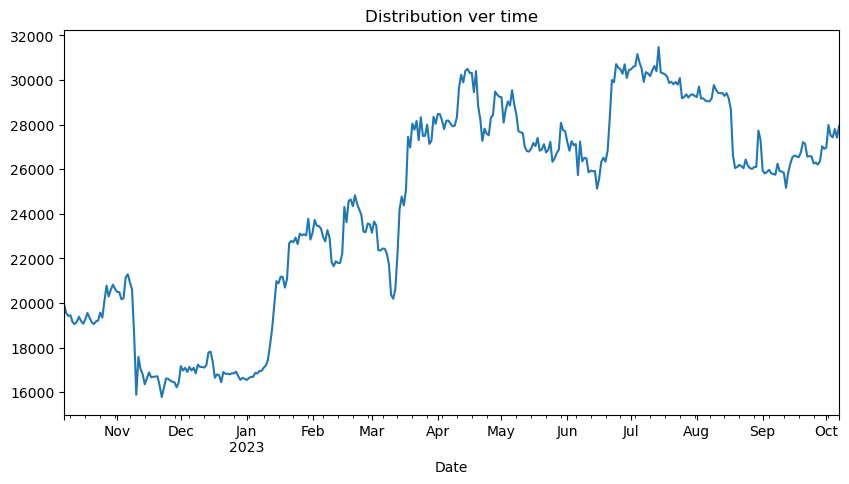

In [83]:
plt.figure(figsize=(10,5))
df_fb['Open'].plot()
plt.title('Distribution ver time')
plt.show()

In [84]:
df_fb.dtypes 

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

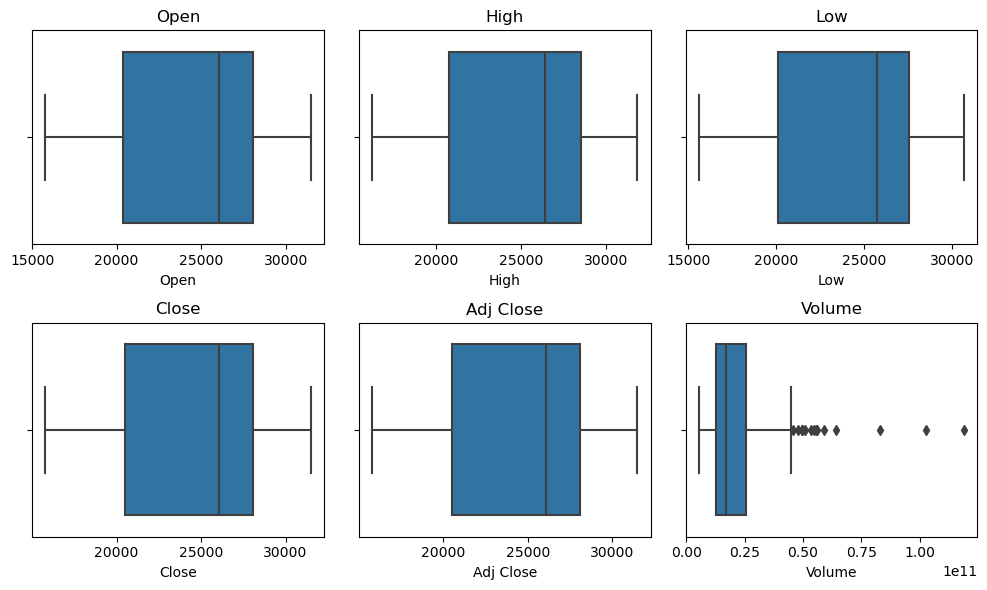

In [85]:
# Filter out non-numeric columns
numeric_features = df_fb.select_dtypes(include=['float64','int64']).columns

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop over the numeric features and create boxplots
for idx, feature in enumerate(numeric_features):
    sns.boxplot(x=df_fb[feature], ax=axes[idx])
    axes[idx].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

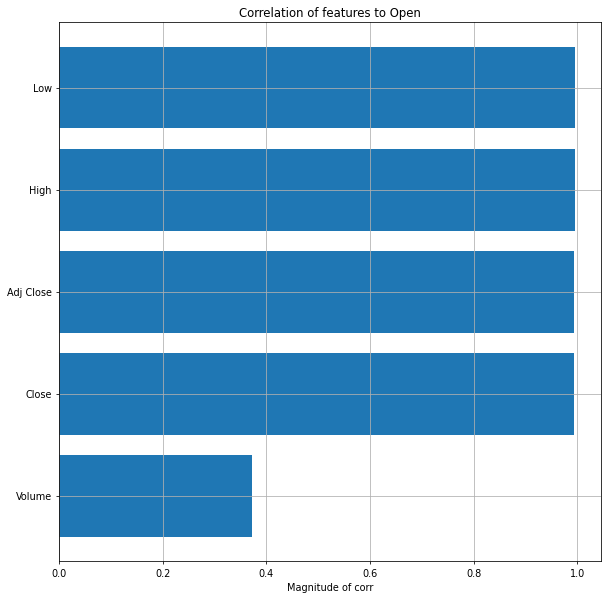

In [86]:
corr_data = df_fb.corr()
corr_data.abs()['Open'].sort_values(ascending=False)


def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(f"Correlation of features to {target}")
    plt.xlabel('Magnitude of corr')
    plt.grid()
    
plt.figure(dpi=70, figsize=(10,10))
plot_corr_scores(corr_data, 'Open')

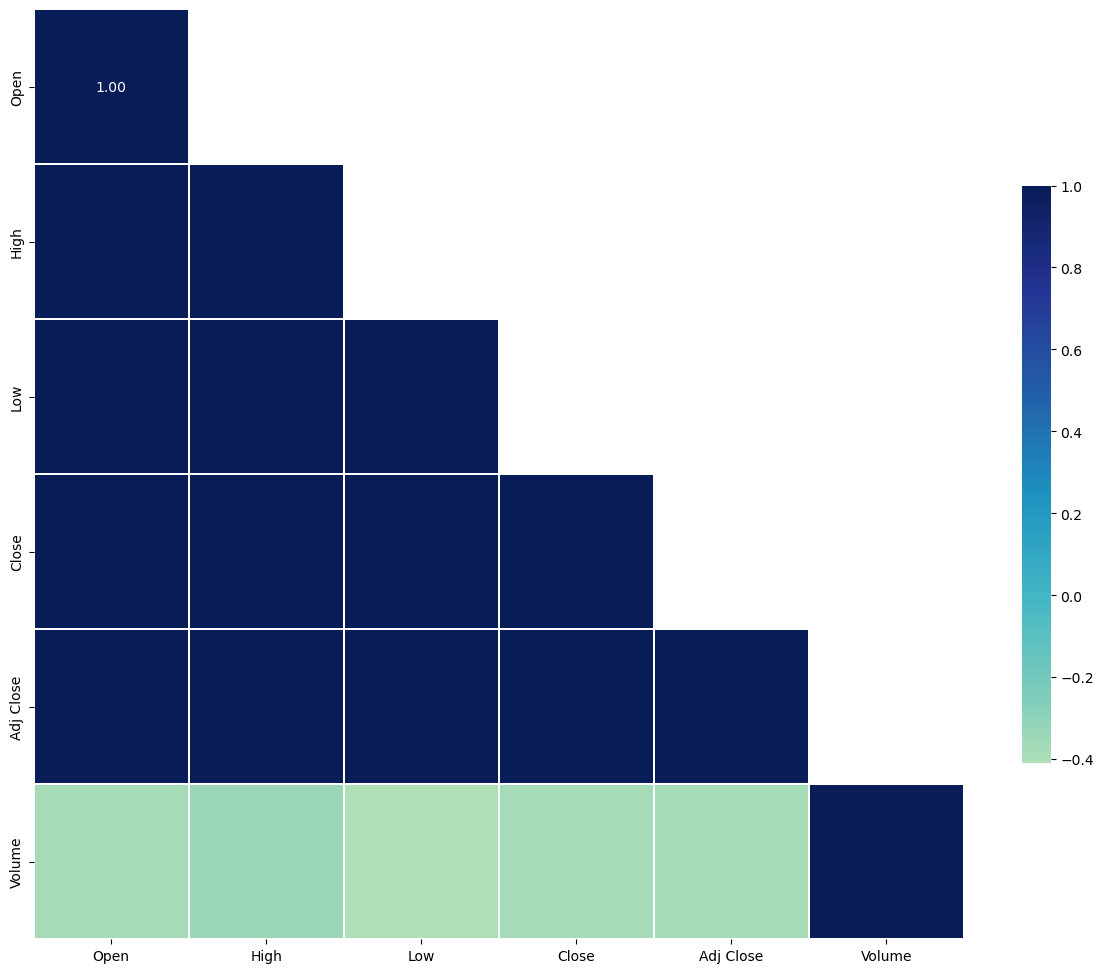

In [87]:
# plotting correlation heatmap
plt.figure(figsize=(15,15))
mask = np.tril(np.ones_like(corr_data, dtype=bool)) #Generate a mask for the lower triangle
sns.heatmap(corr_data, mask=~mask, cmap="YlGnBu", center=0, annot=True,fmt='.2f', square=True, linewidths=.2, cbar_kws={"shrink": .5})
# displaying heatmap
plt.show()

In [88]:
# Utility function to return the VIF value for each feature provided
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features, df):
    """
    Returns a DataFrame containing features and their corresponding variance inflation factor
    features: list of features whoes multicollinearity check is needed
    df: DataFrame of the data under review
    """
    X = df[features]   
    X['intercept'] = 1
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['Vif Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Feature']!='intercept'].sort_values('Vif Factor', ascending=False)
    return vif

In [89]:
def select_features(train_df, threshold):
    """
    Returns two objects;
    1. a DataFrame containing features and their corresponding variance inflation factor, and
    2. Pandas Index object containing the list of features that have the least Multicollinearity in accordance with
       the supplied threshold.
    train_df: The training dataset whoes Multicollinearity is to be checked
    threshold: value to compare VIF value with, above which, the feature droped
    """
    data = train_df.copy()
    flag = True
    while flag:
        features_to_consider = data.columns
        # Calling the "compute_vif" utility function the Variance Inflation Factor dataframe
        sorted_vif_df = (compute_vif(features_to_consider, data).reset_index().drop('index', axis=1))

        # Get the highest vif value to compare against a threshold
        highest_vif = sorted_vif_df.at[0, 'Vif Factor']
        
        # Compare the highest_vif with a threshold (5 was decided for this problem by the team)
        if highest_vif > threshold: # or highest_vif=='inf':
            # Select the feature corresponding to the highest_vif (index 0 for both)
            feature = sorted_vif_df.at[0, 'Feature'] 
            # Drop the feature
            data.drop(feature, axis=1, inplace=True) 
            
        else:
            flag = False
    return sorted_vif_df, data.columns

In [90]:
df_fb.to_csv('cleaned_data')

In [91]:
cleaned_data=pd.read_csv('cleaned_data')

In [92]:
#perform feature selection using the above functions
df = cleaned_data.drop(['Open','Date'], axis=1) #time and pr_wtr are excluded from the exercise
threshold = 5 
df_num= df.select_dtypes(include=['float64','int64'])

vif, features = select_features(df_num, threshold)

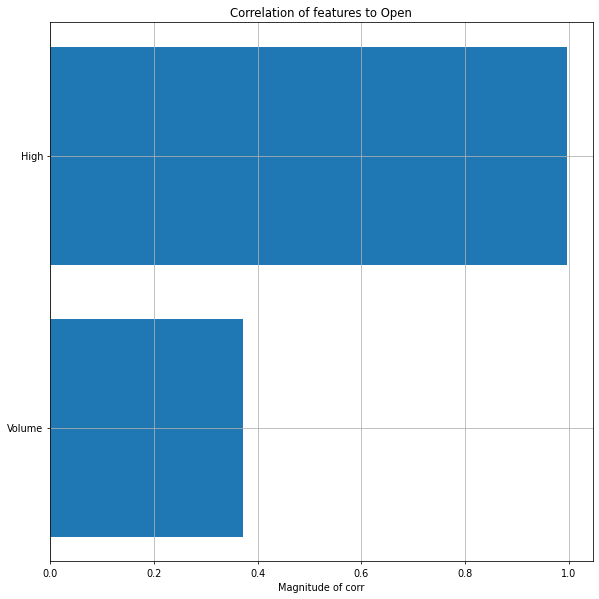

In [93]:
selected_df = cleaned_data[list(features) + ['Open']]
plt.figure(dpi=70, figsize=(10,10))
plot_corr_scores(selected_df.corr(), 'Open')

## Modeling
- Preparing the data in a way that prophet expects

In [94]:
cleaned_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
1,2022-10-08,19546.328125,19601.695313,19299.414063,19416.568359,19416.568359,16437423167
2,2022-10-09,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532
3,2022-10-10,19446.416016,19515.466797,19102.978516,19141.484375,19141.484375,27425022774
4,2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910


In [95]:
new_df = cleaned_data.reset_index()[['Date','Open']].rename(columns={'Date': 'ds', 'Open': 'y'})
new_df.head()

,ds,y
0,2022-10-07,19957.558594
1,2022-10-08,19546.328125
2,2022-10-09,19417.478516
3,2022-10-10,19446.416016
4,2022-10-11,19139.000000


In [96]:
TRAIN_SIZE = int(len(df_fb)*0.8)
TEST_SIZE = int(np.ceil(len(df_fb)*0.2))

In [97]:
train_df = new_df.iloc[:TRAIN_SIZE]
train_df['ds'] = pd.to_datetime(train_df.ds)

In [98]:
train_df.tail()

,ds,y
287,2023-07-21,29805.111328
288,2023-07-22,29908.697266
289,2023-07-23,29790.111328
290,2023-07-24,30081.662109
291,2023-07-25,29178.970703


In [99]:
model = Prophet(weekly_seasonality=False)
model.fit(train_df)

18:39:06 - cmdstanpy - INFO - Chain [1] start processing
18:39:06 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
#predict
future = model.make_future_dataframe(periods= TEST_SIZE , freq= 'D' )

forecast = model.predict(future)
#forecast.head()

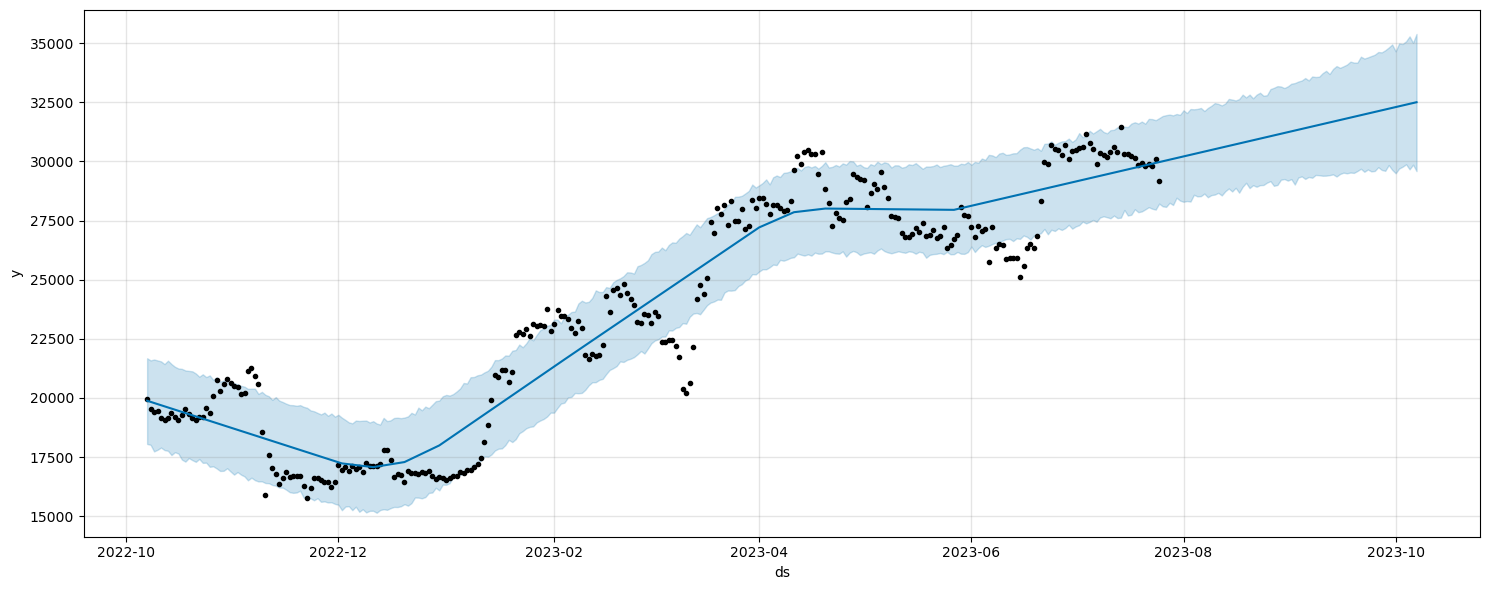

In [101]:
# Plotting the generated forecast
fig1 = model.plot(forecast, uncertainty=True,figsize=(15, 6))

### Observation
The seasonality is well captured by the model, however, the spikes are ignored by the model, hence we will try adding some regressors and observe the performance again

Evaluating the model on the test data

MAE: 3950.70 
MAPE: 14.83%


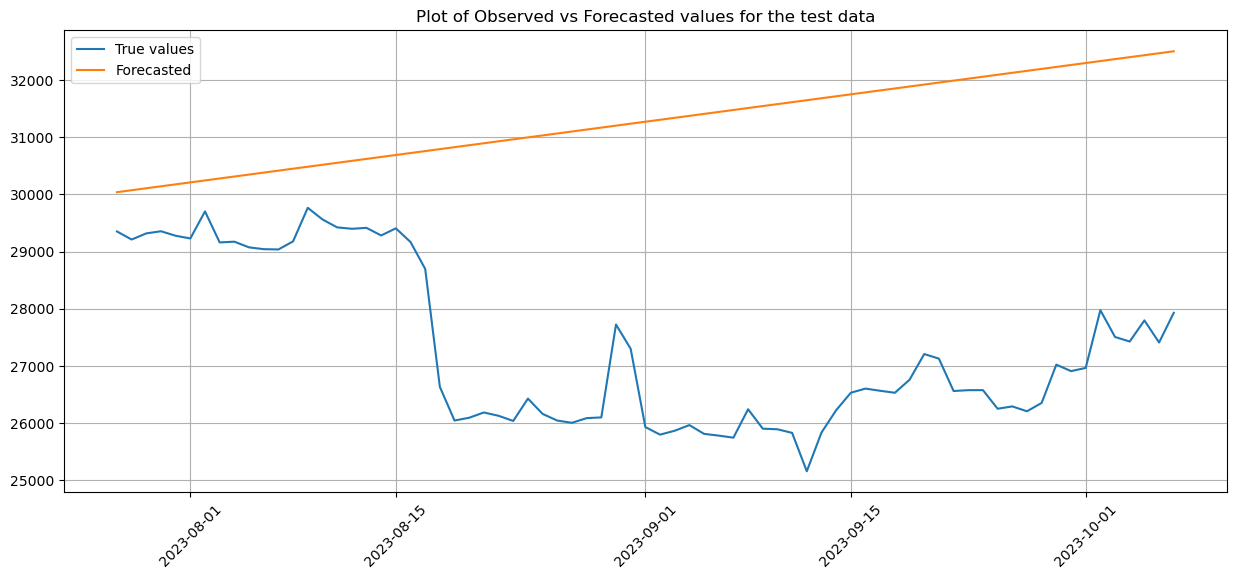

In [102]:
y_true = new_df[TRAIN_SIZE+1:].set_index('ds')
y_true.index = pd.to_datetime(y_true.index)
yhat = forecast[TRAIN_SIZE+1:].set_index('ds')['yhat']
yhat.index = pd.to_datetime(yhat.index)

mae = mean_absolute_error(y_true = y_true, y_pred=yhat)
mape = mean_absolute_percentage_error(y_true=y_true, y_pred=yhat)
print('MAE: {:.2f} \nMAPE: {:.2f}%'.format(mae, mape*100))
print('=='*6)

#plot the result
plt.figure(figsize=(15,6))
plt.plot(y_true, label='True values')
plt.plot(yhat, label='Forecasted')
plt.title('Plot of Observed vs Forecasted values for the test data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Adding external regressors

In [103]:
cleaned_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [104]:
regressor_df = cleaned_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date']].copy()
regressor_df.rename(columns={'Date': 'ds', 'Open': 'y'},inplace=True)
regressor_train = regressor_df.iloc[:TRAIN_SIZE]

predict_df = regressor_df[['ds','High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [107]:

# Initialize the Prophet model
model_regressors = Prophet()

# Add regressors
for feature in regressor_df.columns:
    if feature not in ['ds', 'y']:
        model_regressors.add_regressor(feature)

# Prepare the data for training (make sure regressor_train has 'ds' and 'y' columns)
regressor_train = regressor_df[['ds', 'y'] + [col for col in regressor_df.columns if col not in ['ds', 'y']]]

# Fit the model
model_regressors.fit(regressor_train)
new_forecast = model_regressors.predict(predict_df)

18:53:33 - cmdstanpy - INFO - Chain [1] start processing
18:53:33 - cmdstanpy - INFO - Chain [1] done processing


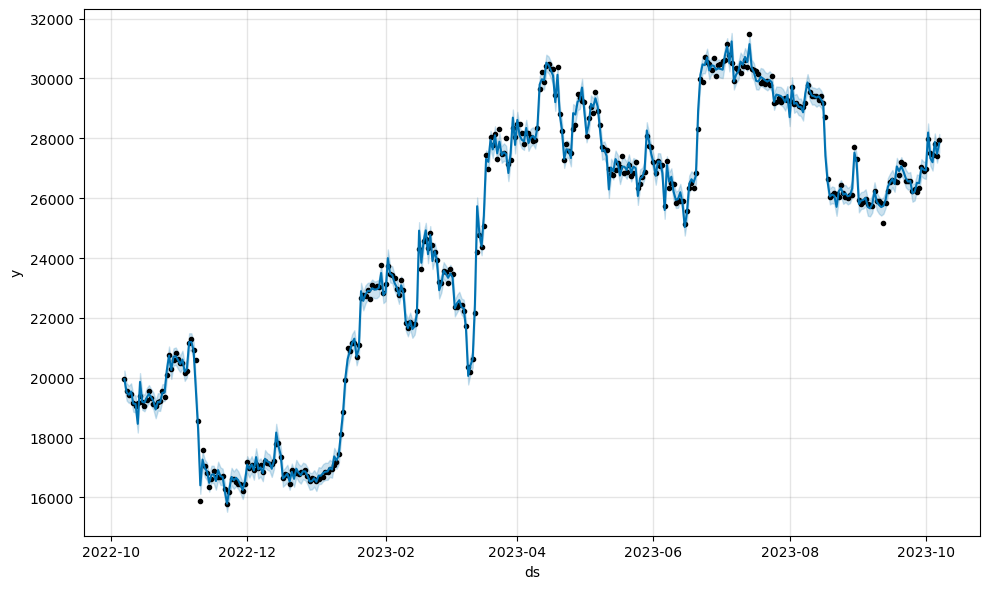

In [108]:
# Plot the forecast
model_regressors.plot(new_forecast, uncertainty=True)
plt.show()

MAE: 134.37 
MAPE: 0.49%


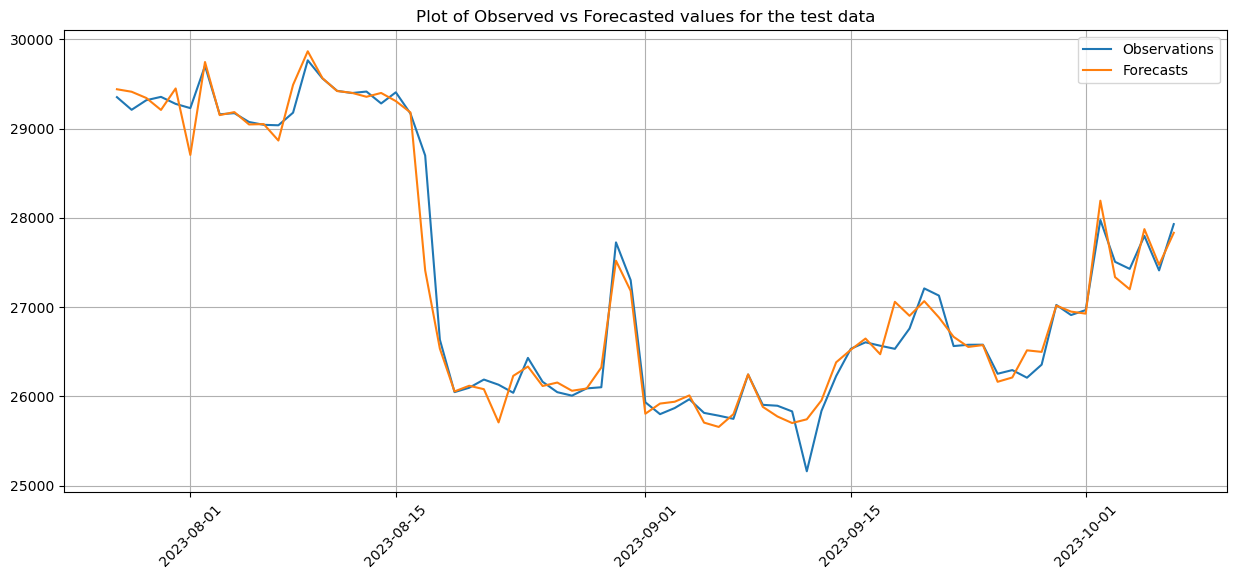

In [109]:
y_true = regressor_df[TRAIN_SIZE+1:].set_index('ds')
y_true.index = pd.to_datetime(y_true.index)
y_true = y_true.y
yhat = new_forecast[TRAIN_SIZE+1:].set_index('ds')['yhat']
yhat.index = pd.to_datetime(yhat.index)

mae = mean_absolute_error(y_true, yhat)
mape = mean_absolute_percentage_error(y_true=y_true, y_pred=yhat)
print('MAE: {:0.2f} \nMAPE: {:.2f}%'.format(mae, mape*100))
print('=='*6)
plt.figure(figsize=(15,6))
plt.plot(y_true, label='Observations')
plt.plot(yhat, label='Forecasts')
plt.title('Plot of Observed vs Forecasted values for the test data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

- Add some more regressors
regressor_df2 = cleaned_df[['time','pr_wtr','tmp_y', 'slp', 'uwnd_x', 'rhum_y', 'uwnd_y', 'vwnd', 'rhum', 'tmp']].copy()
regressor_df2.rename(columns={'time': 'ds', 'pr_wtr': 'y'},inplace=True)
regressor_train2 = regressor_df2.iloc[:TRAIN_SIZE]

predict_df2 = regressor_df2[['ds','tmp_y', 'slp', 'uwnd_x', 'rhum_y', 'uwnd_y', 'vwnd', 'rhum', 'tmp']]

# modelling external regressors prior to model fitting
model_regressors2 = Prophet()
for feature in regressor_df2.columns[2:]:
  model_regressors2.add_regressor(feature)

# fit and predict
model_regressors2.fit(regressor_train2)
new_forecast2 = model_regressors2.predict(predict_df2)
---------------------------------------------------------
# Plot the forecast
model_regressors2.plot(new_forecast2, uncertainty=True)
plt.show()

------------------------------------------------------
y_true = regressor_df2[TRAIN_SIZE+1:].set_index('ds')
y_true.index = pd.to_datetime(y_true.index)
y_true = y_true.y
yhat = new_forecast2[TRAIN_SIZE+1:].set_index('ds')['yhat']
yhat.index = pd.to_datetime(yhat.index)

mae = mean_absolute_error(y_true, yhat)
mape = mean_absolute_percentage_error(y_true=y_true, y_pred=yhat)
print('MAE: {:0.2f} \nMAPE: {:.2f}%'.format(mae, mape*100))
print('=='*6)
plt.figure(figsize=(15,6))
plt.plot(y_true, label='Observations')
plt.plot(yhat, label='Forecasts')
plt.title('Plot of Observed vs Forecasted values for the test data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

## Fine tuning hyperparameters

In [114]:
# Note: This piece of code took about 2 - 3 hours to run on Colab with the default configurations
import itertools
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Parameter grid
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here
coverages = []

# Use cross-validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params, daily_seasonality=False, weekly_seasonality=False)

    

    # Add regressors
    for feature in regressor_df.columns:
        if feature not in ['ds', 'y']:
            m.add_regressor(feature)

    # Fit the model with given params
    m.fit(regressor_train)

    # Cross-validation
    df_cv = cross_validation(m, horizon='100 days', period='100 days', initial='100 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1, metrics=['mae', 'mape', 'coverage'])

    # Append metrics
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])
    coverages.append(df_p['coverage'].values[0])

# Create a DataFrame to store the results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes
tuning_results['coverage'] = coverages

# Display the results
print(tuning_results)


19:21:42 - cmdstanpy - INFO - Chain [1] start processing
19:21:42 - cmdstanpy - INFO - Chain [1] done processing
19:21:50 - cmdstanpy - INFO - Chain [1] start processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing
19:21:55 - cmdstanpy - INFO - Chain [1] start processing
19:21:56 - cmdstanpy - INFO - Chain [1] done processing
19:22:00 - cmdstanpy - INFO - Chain [1] start processing
19:22:00 - cmdstanpy - INFO - Chain [1] done processing
19:22:04 - cmdstanpy - INFO - Chain [1] start processing
19:22:04 - cmdstanpy - INFO - Chain [1] done processing
19:22:08 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing
19:22:12 - cmdstanpy - INFO - Chain [1] start processing
19:22:12 - cmdstanpy - INFO - Chain [1] done processing
19:22:16 - cmdstanpy - INFO - Chain [1] start processing
19:22:16 - cmdstanpy - INFO - Chain [1] done processing
19:22:20 - cmdstanpy - INFO - Chain [1] start processing
19:22:21 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                      0.05                      1.0         additive   
1                      0.05                      1.0   multiplicative   
2                      0.05                      5.0         additive   
3                      0.05                      5.0   multiplicative   
4                      0.05                     10.0         additive   
5                      0.05                     10.0   multiplicative   
6                      0.10                      1.0         additive   
7                      0.10                      1.0   multiplicative   
8                      0.10                      5.0         additive   
9                      0.10                      5.0   multiplicative   
10                     0.10                     10.0         additive   
11                     0.10                     10.0   multiplicative   
12                     0.50                      1.

In [115]:
tuning_results.sort_values(['mape']).head() 

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mae,mape,coverage
0,0.05,1.0,additive,293.289233,0.010458,0.590
2,0.05,5.0,additive,293.289233,0.010458,0.600
4,0.05,10.0,additive,293.289233,0.010458,0.600
1,0.05,1.0,multiplicative,299.869187,0.010712,0.600
3,0.05,5.0,multiplicative,299.869187,0.010712,0.595


In [116]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive'}


## Training the best fbprophet model

In [117]:
# modelling external regressors prior to model fitting
model_regressors = Prophet(weekly_seasonality=False,changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, seasonality_mode='additive')
for feature in regressor_df.columns:
        if feature not in ['ds', 'y']:
            model_regressors.add_regressor(feature)

# fit and predict
model_regressors.fit(regressor_train)
new_forecast3 = model_regressors.predict(predict_df)

19:26:46 - cmdstanpy - INFO - Chain [1] start processing
19:26:46 - cmdstanpy - INFO - Chain [1] done processing


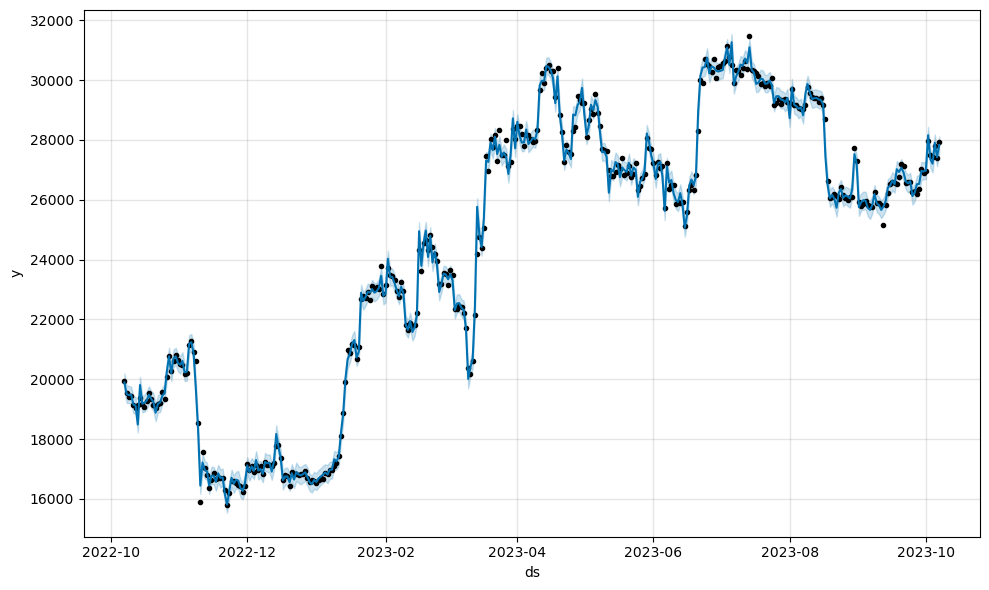

In [118]:
# Plot the forecast
model_regressors.plot(new_forecast3, uncertainty=True)
plt.show()

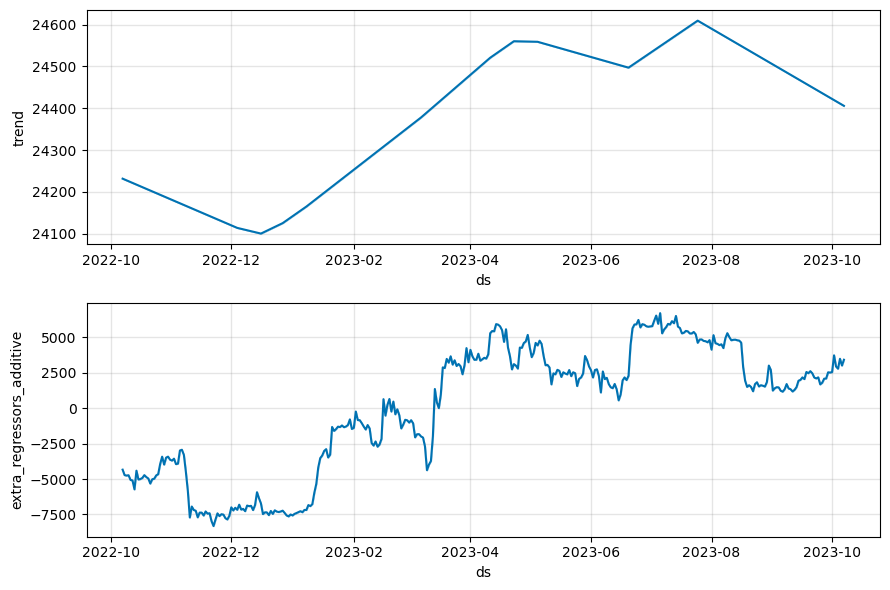

In [119]:
model_regressors.plot_components(new_forecast3, uncertainty=True)
plt.show()

MAE: 137.89 
MAPE: 0.51%


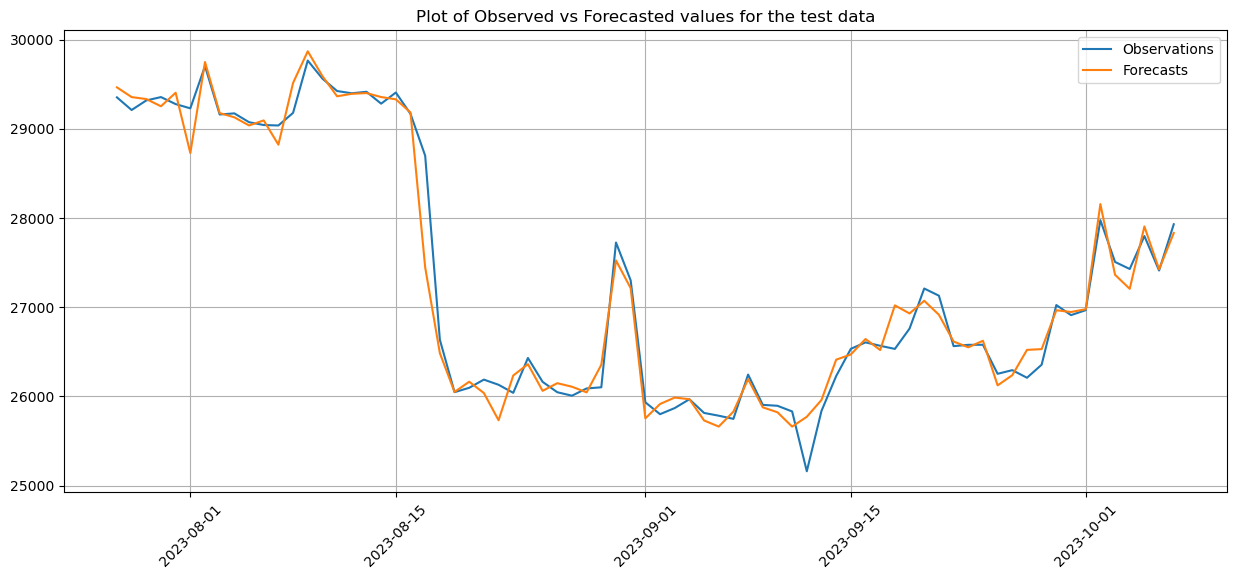

In [120]:
y_true = regressor_df[TRAIN_SIZE+1:].set_index('ds')
y_true.index = pd.to_datetime(y_true.index)
y_true = y_true.y
yhat = new_forecast3[TRAIN_SIZE+1:].set_index('ds')['yhat']
yhat.index = pd.to_datetime(yhat.index)

mae = mean_absolute_error(y_true, yhat)
mape = mean_absolute_percentage_error(y_true=y_true, y_pred=yhat)
print('MAE: {:0.2f} \nMAPE: {:.2f}%'.format(mae, mape*100))
print('=='*6)

plt.figure(figsize=(15,6))
plt.plot(y_true, label='Observations')
plt.plot(yhat, label='Forecasts')
plt.title('Plot of Observed vs Forecasted values for the test data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()